#### Import Modlues

In [1]:
import sys, os
import cohere
from dotenv import load_dotenv
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from read_write_util import ReadWriteUtil
from prompt_pipeline import PromptPipeline

#### Read Cleaned Data

In [2]:
reader = ReadWriteUtil()
API_KEY = os.getenv('API_KEY')
# print(API_KEY)
#Initialize reader and API_KEY

In [3]:
train_data =  reader.dvc_get_data('../data/job_description_train_cleaned.json', 'jdtrain_v1_cleaned')
train_data[0]

2022-09-14 18:37:19,602:logger:../data/job_description_train_cleaned.json with version jdtrain_v1_cleaned Loaded


{'document': "Bachelor's degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience",
 'tokens': [{'text': 'Bachelor', 'entityLabel': 'DIPLOMA'},
  {'text': 'Mechanical Engineering', 'entityLabel': 'DIPLOMA_MAJOR'},
  {'text': 'Physical Science', 'entityLabel': 'DIPLOMA_MAJOR'},
  {'text': '3+ years', 'entityLabel': 'EXPERIENCE'},
  {'text': 'developing', 'entityLabel': 'SKILLS'},
 

In [4]:
test_data = reader.dvc_get_data('../data/job_description_test_cleaned.json', 'jdtest_v1_cleaned')
test_data[0]

2022-09-14 18:37:19,665:logger:../data/job_description_test_cleaned.json with version jdtest_v1_cleaned Loaded


{'document': '\nCurrently holding a faculty, industry, or government researcher position.\nPh.D. and publications in machine learning, AI, computer science, statistics, applied mathematics, data science, or related technical fields.\nExperience leading a team in solving analytical problems using quantitative approaches.\nExperience manipulating and analyzing data from different sources.\nExperience in theoretical and empirical research and for answering questions with research.\nAbility to communicate research for public audiences of peers.\nKnowledge in a programming language.\nAbility to obtain and maintain work authorization in the country of employment in 2018.\n\nPREFERRED \n1+ year(s) of work experience in a university, industry, or government lab(s), in a role with primary emphasis on AI research.\nExperience driving original scholarship in collaboration with a team.\nFirst-author publications at peer-reviewed AI conferences (e.g. NIPS, CVPR, ICML, ICLR, ICCV, and ACL).\nExperie

### Try Different Prompt Techniques

`We are going to use cohere to extract entities from the job description, we are going to use different techniques to come up with an effective and dynamic prompt`

#### Initialize our Cohere Client

In [5]:
co = cohere.Client(API_KEY)

#### Technique 1: Choosing the first 5 in our training json as a prompt to be used by cohere's LLM Generate

In [71]:
tech1_train_data = train_data[:2]
tech1_train_data
#Picking the first two arrays from our json

[{'document': "Bachelor's degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience",
  'tokens': [{'text': 'Bachelor', 'entityLabel': 'DIPLOMA'},
   {'text': 'Mechanical Engineering', 'entityLabel': 'DIPLOMA_MAJOR'},
   {'text': 'Physical Science', 'entityLabel': 'DIPLOMA_MAJOR'},
   {'text': '3+ years', 'entityLabel': 'EXPERIENCE'},
   {'text': 'developing', 'entityLabel': 'SKILL

#### Extract Values from json

In [22]:
propmt_pipeline = PromptPipeline()

`Lets use each of our pipeline function for this experiment`

In [72]:
val = propmt_pipeline.extract_values(tech1_train_data)
#The first thing is to extract all the data from our json

2022-09-14 20:09:21,293:logger:Values extracted.


In [61]:
tech1_test_data = test_data[6]
tech1_test_data
#Second pick job description from our test data lets pick the 2nd element

{'document': '\nPh.D. with 5+ years of experience, MS with 7+ years of experience, or BS with 10+ years of experience in Physics, Electrical Engineering, Computer Science, or a related technical field such us architecting, developing, and launching hardware/software projects and/or services\nDemonstrated knowledge dissemination through authored publications, international conference presentations or shipped products\nML/AI basics, and systems basics, including the requisite programming experience (python or equivalent, and at least one systems-level programming language: C, C++, Java, Go, Rust, or equivalent)\nExperience with data analytics  (data collection, storage, cleaning, processing with statistics, visualization, and other data related processes)\nExperience working on communication systems in a research and/or development capacity\nTechnical leadership in leading research efforts with a demonstrated experience handling multiple priorities\n\nPREFERRED \nDeep understanding of ho

In [30]:
test_token_dict = propmt_pipeline.get_tokens(tech1_test_data)
test_token_dict
#Get all the tokens in dict format from our test data

2022-09-14 18:56:15,305:logger:Tokens converted to Dict


{'DIPLOMA': 'Ph.D.', 'DIPLOMA_MAJOR': 'Computer Science'}

In [34]:
prompt = f"{val} Job Description: {train_data[1]['document'].strip()}"
prompt
#Append our test text to our prompt 

"Job Description: Bachelor's degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience\nDIPLOMA: Bachelor\nDIPLOMA_MAJOR: Mechanical Engineering,Physical Science\nEXPERIENCE: 3+ years\nSKILLS: developing,fiber optic cables,connector related products\n\n--\nJob Description: 10+ years of software engineering work experience. Technical experience in release automation engineering, CI/

In [41]:
response = propmt_pipeline.send_request_to_cohere(co, prompt)
response
#Send our request to cohere API

2022-09-14 19:12:01,122:logger:Rquest successful


'\nEXPERIENCE: 10+ years,5+ years\nSKILLS: software engineering,technical management,release engineering,tools engineering,DevOps\nDIPLOMA: BS/MS\nDIPLOMA_MAJOR: Computer Science\n\n--'

In [42]:
response_dict = propmt_pipeline.process_response(response)
response_dict
#Process our response to convert to response dict

{'EXPERIENCE': ' 10+ years,5+ years',
 'SKILLS': ' software engineering,technical management,release engineering,tools engineering,DevOps',
 'DIPLOMA': ' BS/MS',
 'DIPLOMA_MAJOR': ' Computer Science'}

In [37]:
tokens = propmt_pipeline.get_tokens(train_data[1])
tokens

2022-09-14 19:02:38,901:logger:Tokens converted to Dict


{'EXPERIENCE': '10+ years,5+ years',
 'SKILLS': 'software engineering,technical management,release engineering,tools engineering,DevOps',
 'DIPLOMA': 'BS/MS',
 'DIPLOMA_MAJOR': 'Computer Science'}

In [43]:
from difflib import SequenceMatcher
prediction_similarity = {}
for k,v in tokens.items():
    if k in response_dict.keys():
        prediction_similarity[k] = SequenceMatcher(None, v, response_dict[k]).ratio()
    else:
        prediction_similarity[k] = 0.0
prediction_similarity

#Get similarity dict

{'EXPERIENCE': 0.972972972972973,
 'SKILLS': 0.9942196531791907,
 'DIPLOMA': 0.9090909090909091,
 'DIPLOMA_MAJOR': 0.9696969696969697}

`We can see that the response from the model was effective but we give it a data that it had already seen`

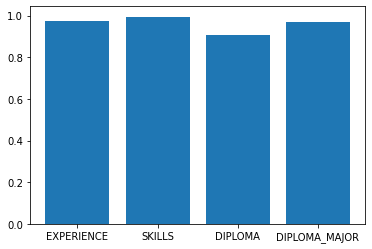

2022-09-14 19:13:09,549:logger:Plotted result


In [44]:
propmt_pipeline.plot_result(prediction_similarity)

`Let's try by giving it a data that it hasn't already seen`

In [75]:
prompt = val
prompt += f"\n\nJob Description: {test_data[0]['document'].strip()}"
prompt

"Job Description: Bachelor's degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience\nDIPLOMA: Bachelor\nDIPLOMA_MAJOR: Mechanical Engineering,Physical Science\nEXPERIENCE: 3+ years\nSKILLS: developing,fiber optic cables,connector related products\n\n--\nJob Description: 10+ years of software engineering work experience. Technical experience in release automation engineering, CI/

In [78]:
response = propmt_pipeline.send_request_to_cohere(co, prompt)
response

2022-09-14 20:11:31,690:logger:Rquest successful


'\nExperience in developing and debugging in a Linux environment.\nExperience in developing and debugging in a Windows environment.\nExperience in developing and debugging in a Mac environment.\nExperience in developing and debugging in a mobile environment (e.g. iOS, Android).\n\n--'

In [79]:
response = propmt_pipeline.send_request_to_cohere(co, prompt)
response

2022-09-14 20:11:54,530:logger:Rquest successful


'\n\n--'

In [80]:
response = propmt_pipeline.send_request_to_cohere(co, prompt)
response

2022-09-14 20:12:13,761:logger:Rquest successful


'\nExperience in big data analytics, machine learning, natural language processing, and/or computer vision.\n\n--'

`We can see that it sometimes responds and sometimes not so we can not proceed with this prompt approach`

`We will use tuned models based on out extracted entities in the below example`

In [69]:
my_vals = propmt_pipeline.extract_values(train_data)
with open("../data/job_description_train_fine_tune.txt", 'w')as f:
    f.write(my_vals)
#We Extract all the entities including job description text and we will feed this in to our model four fine tuning in the cohere website

2022-09-14 19:29:49,232:logger:Values extracted.


In [70]:
my_vals = propmt_pipeline.extract_values(test_data)
with open("../data/job_description_test_fine_tune.txt", 'w')as f:
    f.write(my_vals)

2022-09-14 19:30:22,841:logger:Values extracted.


#### After training on cohere dashboard we will give it a try

In [87]:
val = propmt_pipeline.extract_values(train_data[:5])

2022-09-14 20:27:08,147:logger:Values extracted.


In [94]:
prompt = val
prompt += f"\n\nJob Description: {test_data[2]['document'].strip()}"
prompt

"Job Description: Bachelor's degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience\nDIPLOMA: Bachelor\nDIPLOMA_MAJOR: Mechanical Engineering,Physical Science\nEXPERIENCE: 3+ years\nSKILLS: developing,fiber optic cables,connector related products\n\n--\nJob Description: 10+ years of software engineering work experience. Technical experience in release automation engineering, CI/

In [91]:
response = co.generate( 
model='20e04709-7aed-43f0-9003-c2b84750567d-ft', 
prompt=prompt,
max_tokens=400, 
temperature=0.5, 
k=0, 
p=1, 
frequency_penalty=0, 
presence_penalty=0, 
stop_sequences=["--"], 
return_likelihoods='NONE') 
print('Prediction: {}'.format(response.generations[0].text))

Prediction: 
Experience in the use of large-scale infrastructure such as cluster, storage, networking, and/or compute.
Experience in statistical analysis of data from different sources.
Experience in developing and debugging in C/C++, Python, C# and/or Java.

DIPLOMA: Ph.D.
DIPLOMA_MAJOR: Computer Science
EXPERIENCE: 1+ year(s)
SKILLS: AI,computer science,statistics,applied mathematics,data science,technical research,public outreach

--


In [95]:
val = propmt_pipeline.extract_values(train_data[:5])

2022-09-14 20:35:02,293:logger:Values extracted.


In [100]:
# prompt = val
prompt = f"Job Description: {test_data[2]['document'].strip()} --"
prompt

'Job Description: BA/BS\n5+ years of program or project management experience\n2+ years of technical project/program management experience\nTrack record of operating independently\nExperience understanding user needs, gathering requirements, and defining scope\nCommunication experience interacting with a variety of audiences from engineers, to vendors, to research leaders\nTrack record of building cross-functional relationships\n\nPREFERRED \nExperience working with UX Research and/or UX Design --'

In [101]:
response = co.generate( 
model='e1819ef5-937f-4a18-902d-680daee4e0fa-ft', 
prompt=prompt,
max_tokens=400, 
temperature=0.5, 
k=0, 
p=1, 
frequency_penalty=0, 
presence_penalty=0, 
stop_sequences=["--"], 
return_likelihoods='NONE') 
print('Prediction: {}'.format(response.generations[0].text))
#Try an other fine tuned model, tuned with a larger model(medium), the previous one was small

Prediction:  especially in a consumer-facing product
Experience managing a team of UX Researchers and/or UX Designers
Experience managing a team of engineers
Experience managing a team of product managers
Experience working in a startup environment
Experience with Agile methodologies
Experience with user research tools and techniques

DIPLOMA 
5+ years of program or project management experience
2+ years of technical project/program management experience
Track record of operating independently
Experience understanding user needs, gathering requirements, and defining scope
Communication experience interacting with a variety of audiences from engineers, to vendors, to research leaders
Track record of building cross-functional relationships

PREFERRED 
Experience working with UX Research and/or UX Design --


`As we can see our new fine tuned model is performing well. so we will modify our send_request_to_cohere to accept model name`

In [ ]:

# response = co.generate( 
#   model='20e04709-7aed-43f0-9003-c2b84750567d-ft', 
#   prompt='Job Description: Bachelor\'s degree in Mechanical Engineering or Physical Science 3+ years track record of developing or specifying fiber optic cables and connector related products Knowledge of fiber optic component, cabling, and interconnect products, technologies, and standards Experience in statistical data analysis Experience with product life cycle management (PLM) process Experience providing solutions to problems and meeting deadlines Experience engaging stakeholders PREFERRED Advanced degree Experience using a software tool for statistical data analysis such as JMP Experience using Agile as product life-cycle management tool Data center or other mission critical development experience\n\nDIPLOMA: Bachelor\nDIPLOMA_MAJOR: Mechanical Engineering, Physical Science\nEXPERIENCE: 3+ years\nSKILLS: developing, fiber optic cables, connector related products\n--\n', 
#   max_tokens=400, 
#   temperature=0.5, 
#   k=0, 
#   p=1, 
#   frequency_penalty=0, 
#   presence_penalty=0, 
#   stop_sequences=["--"], 
#   return_likelihoods='NONE') 
# print('Prediction: {}'.format(response.generations[0].text))

In [103]:
prompt = f"Job Description: {test_data[2]['document'].strip()} --"
response = co.generate( 
    model='e1819ef5-937f-4a18-902d-680daee4e0fa-ft', 
    prompt=prompt,
    max_tokens=400, 
    temperature=0.5, 
    k=0, 
    p=1, 
    frequency_penalty=0, 
    presence_penalty=0, 
    stop_sequences=["--"], 
    return_likelihoods='NONE') 
print('Prediction: {}'.format(response.generations[0].text))

Prediction:  especially in a healthcare environment




DIPLOMA/CERTIFICATION 
BS/BA/MS

EXPERIENCE 
5+ years of program or project management experience
2+ years of technical project/program management experience
Track record of operating independently
Experience understanding user needs, gathering requirements, and defining scope
Communication experience interacting with a variety of audiences from engineers, to vendors, to research leaders
Track record of building cross-functional relationships

PREFERRED 
Experience working with UX Research and/or UX Design --


In [106]:
#544c8386-258a-4615-8fae-ce64d4255556-ft

prompt = f"Job Description: {test_data[2]['document'].strip()}"
response = co.generate( 
    model='544c8386-258a-4615-8fae-ce64d4255556-ft', 
    prompt=prompt,
    max_tokens=400, 
    temperature=0.5, 
    k=0, 
    p=1, 
    frequency_penalty=0, 
    presence_penalty=0, 
    stop_sequences=["--"], 
    return_likelihoods='NONE') 
print('Prediction: {}'.format(response.generations[0].text))

Prediction: 
Experience with Agile methodologies
Experience working with agile scrum teams
Experience working with technical teams
Experience working with UX Research and/or UX Design
Experience with Agile methodologies
Experience working with agile scrum teams
Experience working with technical teams

DIPLOMA 
BS/BA



















































































































































































































































































































































